# Power Spectral Density (PSD) and Wiener–Khinchin Theorem

## Definition of PSD
The **power spectral density (PSD)** quantifies how the power of a signal is distributed across different frequencies. According to the **Wiener–Khinchin theorem**, the PSD is the **Fourier transform** of the **autocorrelation function**.

Mathematically, the **autocorrelation function** \( R_{xx}(\tau) \) of a signal \( x(t) \) is defined as:

$$
R_{xx}(\tau) = \lim_{T\to\infty} \frac{1}{T} \int_{-T/2}^{T/2} x(t)x^*(t+\tau) \, dt.
$$

The **power spectral density (PSD)** is then given by:

$$
S_{xx}(f) = \int_{-\infty}^{\infty} R_{xx}(\tau) e^{-i2\pi f\tau} \, d\tau.
$$

## Understanding of PSD in terms of phase information compared to Fourier Transform

### 1. Fourier Representation of the Signal

Assume that \( x(t) \) has a Fourier transform:

$$
x(t) = \int_{-\infty}^{\infty} X(f) e^{i2\pi f t} \, df.
$$

### 2. Compute the Autocorrelation Function

The autocorrelation function is defined as:

$$
R_{xx}(\tau) = \int_{-\infty}^{\infty} x(t) x^*(t+\tau) \, dt.
$$

Substituting the Fourier representation of \( x(t) \):

$$
x(t) = \int_{-\infty}^{\infty} X(f) e^{i2\pi f t} \, df,
$$

$$
x^*(t+\tau) = \int_{-\infty}^{\infty} X^*(f') e^{-i2\pi f' (t+\tau)} \, df'.
$$

Thus,

$$
R_{xx}(\tau) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} X(f) X^*(f') e^{i2\pi f t} e^{-i2\pi f' (t+\tau)} \, df \, df' \, dt.
$$

### 3. Evaluate the Integral Over \( t \)

Rearrange the terms:

$$
R_{xx}(\tau) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} X(f) X^*(f') e^{-i2\pi f' \tau} \left[ \int_{-\infty}^{\infty} e^{i2\pi (f - f') t} \, dt \right] df \, df'.
$$

The inner integral is a **Dirac delta function**:

$$
\int_{-\infty}^{\infty} e^{i2\pi (f - f') t} \, dt = \delta(f - f').
$$

Thus,

$$
R_{xx}(\tau) = \int_{-\infty}^{\infty} X(f) X^*(f) e^{-i2\pi f \tau} \, df.
$$

Since \( X(f) X^*(f) = |X(f)|^2 \), this simplifies to:

$$
R_{xx}(\tau) = \int_{-\infty}^{\infty} |X(f)|^2 e^{-i2\pi f \tau} \, df.
$$

### 4. Fourier Transform of the Autocorrelation Function

Now, taking the Fourier transform of \( R_{xx}(\tau) \):

$$
S_{xx}(f) = \int_{-\infty}^{\infty} R_{xx}(\tau) e^{i2\pi f \tau} \, d\tau.
$$

Substituting \( R_{xx}(\tau) \):

$$
S_{xx}(f) = \int_{-\infty}^{\infty} \left[ \int_{-\infty}^{\infty} |X(f')|^2 e^{-i2\pi f' \tau} \, df' \right] e^{i2\pi f \tau} \, d\tau.
$$

Interchanging the order of integration:

$$
S_{xx}(f) = \int_{-\infty}^{\infty} |X(f')|^2 \left[ \int_{-\infty}^{\infty} e^{i2\pi (f - f') \tau} \, d\tau \right] df'.
$$

The inner integral is again a **Dirac delta function**:

$$
\int_{-\infty}^{\infty} e^{i2\pi (f - f') \tau} \, d\tau = \delta(f - f').
$$

### 5. Final Result

Using the delta function property:

$$
S_{xx}(f) = \int_{-\infty}^{\infty} |X(f')|^2 \delta(f - f') \, df' = |X(f)|^2.
$$

Thus, the **power spectral density is simply the squared magnitude of the Fourier transform**:

$$
S_{xx}(f) = |X(f)|^2.
$$

This confirms that **the PSD is equivalent to the Fourier transform of the autocorrelation function** and explains why it ignores phase information—only the power (magnitude squared) of each frequency component is retained.


In [14]:
import numpy as np
from scipy.signal import welch
import matplotlib.pyplot as plt
import pandas

# Overnight data

number of point is 150000


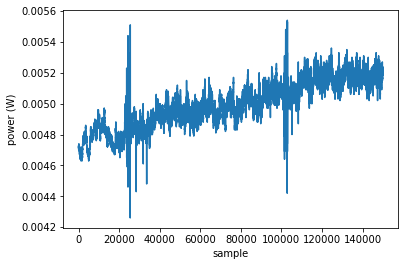

In [15]:
power_time_series = pandas.read_csv("Data_overnight.csv")["power"]
plt.plot(power_time_series)
plt.xlabel("sample")
plt.ylabel("power (W)")
print(f"number of point is {len(power_time_series)}")

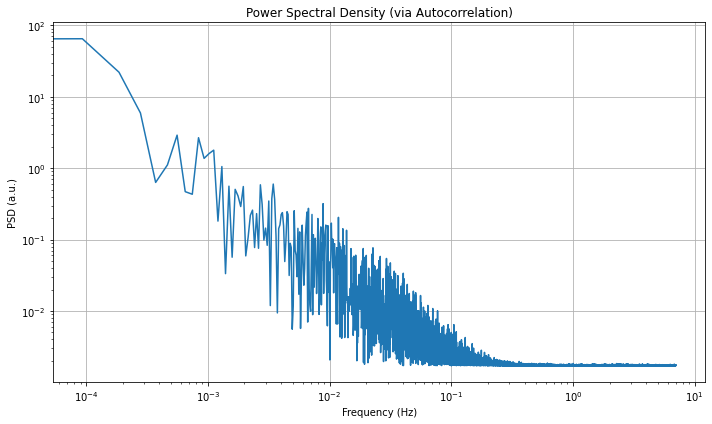

In [ ]:
# Parameters
N = len(power_time_series)          # number of data points
time = 10735.5
dt = time/N          # time step in seconds
time = np.arange(N) * dt

data = power_time_series

# Remove the mean to get a zero-mean signal (important for autocorrelation)
data_zero_mean = data - np.mean(data)

# Compute the autocorrelation function.
# Using np.correlate with mode='full'. The autocorrelation is symmetric,
# so we take the second half (lags >= 0).
autocorr_full = np.correlate(data_zero_mean, data_zero_mean, mode='full')
autocorr = autocorr_full[N-1:]

# Compute the Fourier transform of the autocorrelation to obtain the PSD.
psd_complex = np.fft.fft(autocorr)
psd = np.real(psd_complex)  # PSD should be real-valued (by the Wiener-Khinchin theorem)

# Create a frequency axis for the PSD.
freqs = np.fft.fftfreq(len(psd), d=dt)

# Since the autocorrelation is real and even, we only need the positive frequencies.
mask = freqs >= 0
freqs_pos1 = freqs[mask]
psd_pos1 = psd[mask]

# Plot the resulting PSD.
plt.figure(figsize=(10, 6))
plt.loglog(freqs_pos1, psd_pos1)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (a.u.)')
plt.title('Power Spectral Density (via Autocorrelation)')
plt.grid(True)
plt.tight_layout()
plt.show()


# Afternoon Data

number of point is 96516


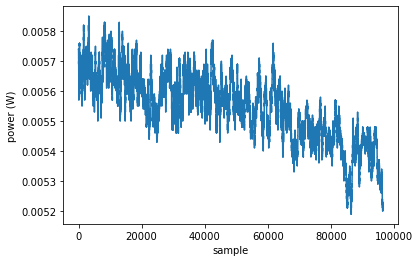

In [17]:
power_time_series = pandas.read_csv("Data_afternoon.csv")["power"]
plt.plot(power_time_series)
plt.xlabel("sample")
plt.ylabel("power (W)")
print(f"number of point is {len(power_time_series)}")


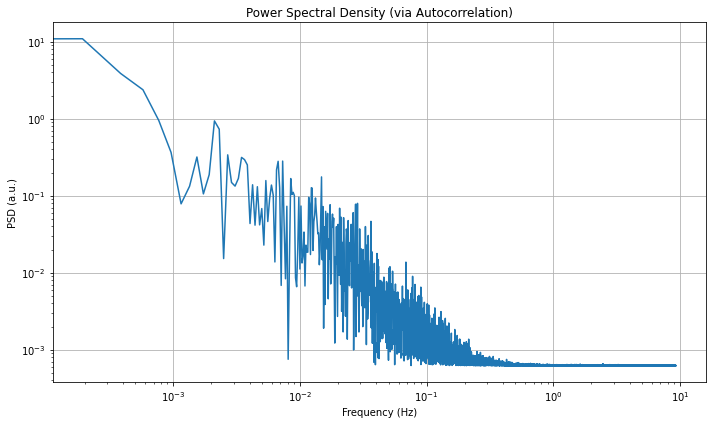

In [18]:
# Parameters
N = len(power_time_series)          # number of data points
time = 5201.739
dt = time/N          # time step in seconds
time = np.arange(N) * dt

data = power_time_series

# Remove the mean to get a zero-mean signal (important for autocorrelation)
data_zero_mean = data - np.mean(data)

# Compute the autocorrelation function.
# Using np.correlate with mode='full'. The autocorrelation is symmetric,
# so we take the second half (lags >= 0).
autocorr_full = np.correlate(data_zero_mean, data_zero_mean, mode='full')
autocorr = autocorr_full[N-1:]

# Compute the Fourier transform of the autocorrelation to obtain the PSD.
psd_complex = np.fft.fft(autocorr)
psd = np.real(psd_complex)  # PSD should be real-valued (by the Wiener-Khinchin theorem)

# Create a frequency axis for the PSD.
freqs = np.fft.fftfreq(len(psd), d=dt)

# Since the autocorrelation is real and even, we only need the positive frequencies.
mask = freqs >= 0
freqs_pos2 = freqs[mask]
psd_pos2 = psd[mask]

# Plot the resulting PSD.
plt.figure(figsize=(10, 6))
plt.loglog(freqs_pos2, psd_pos2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (a.u.)')
plt.title('Power Spectral Density (via Autocorrelation)')
plt.grid(True)
plt.tight_layout()
plt.show()


# Plot together

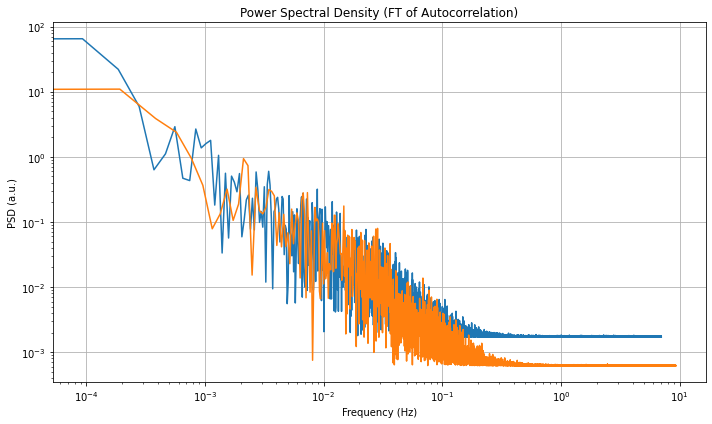

In [21]:
# Plot the resulting PSD.
plt.figure(figsize=(10, 6))
plt.loglog(freqs_pos1, psd_pos1, label = "3h Overnight")
plt.loglog(freqs_pos2, psd_pos2, label = "1.5h afternoon")
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (a.u.)')
plt.title('Power Spectral Density (FT of Autocorrelation)')
plt.grid(True)
plt.tight_layout()
plt.show()